# Module 5

#### PERSONAL REFERENCES
The expected return of the portfolio is calculated as a weighted sum of the individual assets' returns.
If a portfolio contained four equally-weighted assets with expected returns of 4, 6, 10, and 14%, the
portfolio's expected return would be:
(4% x 25%) + (6% x 25%) + (10% x 25%) + (14% x 25%) = 8.5%

The portfolio's risk is a complicated function of the variances of each asset and the correlations of each pair of assets. To calculate the risk of a four-asset portfolio, an investor needs each of the four assets' variances and six correlation values, since there are six possible two-asset combinations with four assets. Because of the asset correlations, the total portfolio risk, or standard deviation, is lower than what would be calculated by a weighted sum.

Annualized Volatility Formula = √252 * √Variance  
Daily Volatility Formula = √Variance  
annual mean = daily mean \* 252  
annual stdev=daily stdev \* sqrt(252)

TASK 5.1

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("pvrbollinger.csv")

In [54]:
df

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,dra,up,down
0,0,PVR,EQ,2017-05-15,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,NaN,NaN,NaN
1,1,PVR,EQ,2017-05-16,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,NaN,NaN,NaN
2,2,PVR,EQ,2017-05-17,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,NaN,NaN,NaN
3,3,PVR,EQ,2017-05-18,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,NaN,NaN,NaN
4,4,PVR,EQ,2017-05-19,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,490,PVR,EQ,2019-05-07,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23,1735.535714,1829.570654,1641.500775
490,491,PVR,EQ,2019-05-08,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91,1739.253571,1830.712208,1647.794935
491,492,PVR,EQ,2019-05-09,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52,1743.467857,1832.428960,1654.506754
492,493,PVR,EQ,2019-05-10,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01,1743.364286,1832.462153,1654.266419


In [55]:
df["Daily Returns"]=df["Close Price"].pct_change()
df=df.dropna()

In [56]:
tmean=df["Daily Returns"].mean()
tstd=df["Daily Returns"].std()

In [57]:
import math
annual_mean=tmean*252
volatality=tstd*math.sqrt(252)
print("annual mean=",annual_mean,"     volatality=",volatality)

annual mean= 0.13790280337705257      volatality= 0.3121897029754599


TASK 5.2

In [5]:
cipla=pd.read_csv("CIPLA.csv")
idfc=pd.read_csv("IDBI.csv")
voltas=pd.read_csv("VOLTAS.csv")
nifty=pd.read_csv("Nifty50.csv")
pvr=pd.read_csv("PVRbollinger.csv")

In [6]:
dataf=pd.DataFrame(cipla["Close Price"])
dataf["CPidfc"]=idfc["Close Price"]
dataf["CPVoltas"]=voltas["Close Price"]
dataf["CPnifty"]=nifty["Close"]
dataf["CPpvr"]=pvr["Close Price"]

In [7]:
dataf

,Close Price,CPidfc,CPVoltas,CPnifty,CPpvr
0,569.00,75.05,431.85,9445.40,1524.95
1,565.60,76.65,432.45,9512.25,1539.00
2,562.35,75.95,430.20,9525.75,1530.30
3,560.10,69.95,414.10,9429.45,1515.05
4,564.95,68.75,415.75,9427.90,1513.55
...,...,...,...,...,...
491,557.95,37.45,574.10,11301.80,1758.45
492,558.00,37.25,580.05,11278.90,1715.40
493,557.75,34.45,572.20,11148.20,1724.00
494,555.55,NaN,NaN,NaN,NaN


In [18]:
dataf.columns=["CPcipla","CPidfc","CPVoltas","CPnifty","CPpvr"]
dfan=dataf.pct_change()
meanli=dfan.mean()
weights=np.asarray([0.2,0.2,0.2,0.2,0.2])
annual_mean=(np.sum(meanli*weights))*252
print("annual mean =",annual_mean)
covli=dfan.cov()
covli=np.dot(weights,np.dot(covli,weights.T))
volatality=np.sqrt(252)*np.sqrt(covli)
print("volatality =",volatality)

annual mean = 0.02175223305455713
volatality = 0.17739511089872534


TASK 5.3

In [9]:
dataf.columns=["CPcipla","CPidfc","CPVoltas","CPnifty","CPpvr"]
dfan=dataf.pct_change()
dfan=dfan.dropna()
meanli=dfan.mean()
coli=dfan.cov()
port_num=30000
finalm=np.zeros((port_num,3))
for i in range(port_num):
    weights=np.random.random(5)
    weights=weights/np.sum(weights)  #scaling between 0 to 1
    annual_mean=np.sum(weights*meanli*252)
    annual_cov=np.sqrt(np.dot(weights.T,np.dot(coli,weights)))*np.sqrt(252)
    finalm[i,0]=annual_mean
    finalm[i,1]=annual_cov
    finalm[i,2]=annual_mean/annual_cov
    

In [10]:
finaldf=pd.DataFrame(finalm,columns=['returns','volatality','sharpe ratio'])

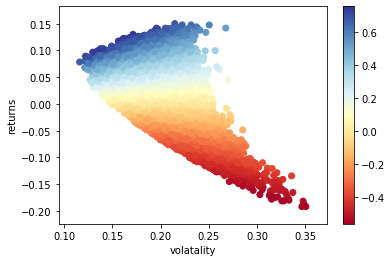

In [41]:
plt.scatter(finaldf["volatality"],finaldf["returns"], c=finaldf["sharpe ratio"],cmap='RdYlBu')
plt.xlabel("volatality")
plt.ylabel("returns")
plt.colorbar()

TASK 5.4

In [35]:
max_s_r=finaldf.iloc[finaldf['sharpe ratio'].idxmax()]
min_vol=finaldf.iloc[finaldf['volatality'].idxmin()]

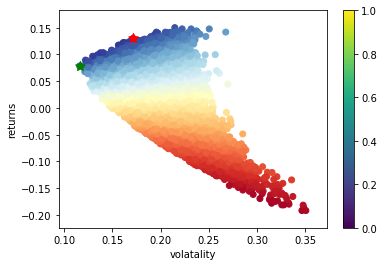

In [40]:
plt.scatter(finaldf["volatality"],finaldf["returns"], c=finaldf["sharpe ratio"],cmap='RdYlBu')
plt.scatter(max_s_r["volatality"],max_s_r["returns"],color="red",s=100,marker=(5,1,0))
plt.scatter(min_vol["volatality"],min_vol["returns"],color='green',s=100,marker=(5,1,0))
plt.xlabel("volatality")
plt.ylabel("returns")
plt.colorbar()